In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from hub_simulation import *

In [2]:
df = pd.read_table('sat_sources_data/selection_FWHM.txt')
df = df.sort_values(by='L')
df.index = range(len(df))
print(df)

files = os.listdir('../selected')
files.sort()
files = files[1:8*3+1]
files

      Window scale  index           L         B    FWHM250    FWHM160  \
0  26.03' x 20.86'  34549   24.788619  0.083172  32.561327  30.186918   
1  29.94' x 33.61'  34566   43.164813 -0.028771  29.329848  26.669271   
2  44.98' x 36.05'  34567   43.166813  0.011346  32.561327  30.186918   
3   43.11' x 48.4'  34468  331.512263 -0.103315  30.923131  28.412145   
4  31.24' x 25.03'  34479  333.603657 -0.213103  32.428383  30.043469   
5   43.11' x 48.4'  34500  345.406997 -0.952101  33.445479  31.138562   
6  2.008º x 1.347º  34515  351.159893  0.698084  29.370052  26.713479   
7  53.98' x 43.26'  34516  351.243729  0.668585  38.517527  36.532313   

      FWHM70  
0  28.276492  
1  24.485914  
2  28.276492  
3  26.373472  
4  28.123300  
5  29.290272  
6  24.534057  
7  34.970271  


['im070_sat_1_selected.fits',
 'im070_sat_2_selected.fits',
 'im070_sat_3_selected.fits',
 'im070_sat_4_selected.fits',
 'im070_sat_5_selected.fits',
 'im070_sat_6_selected.fits',
 'im070_sat_7_selected.fits',
 'im070_sat_8_selected.fits',
 'im160_sat_1_selected.fits',
 'im160_sat_2_selected.fits',
 'im160_sat_3_selected.fits',
 'im160_sat_4_selected.fits',
 'im160_sat_5_selected.fits',
 'im160_sat_6_selected.fits',
 'im160_sat_7_selected.fits',
 'im160_sat_8_selected.fits',
 'im250_sat_1_selected.fits',
 'im250_sat_2_selected.fits',
 'im250_sat_3_selected.fits',
 'im250_sat_4_selected.fits',
 'im250_sat_5_selected.fits',
 'im250_sat_6_selected.fits',
 'im250_sat_7_selected.fits',
 'im250_sat_8_selected.fits']

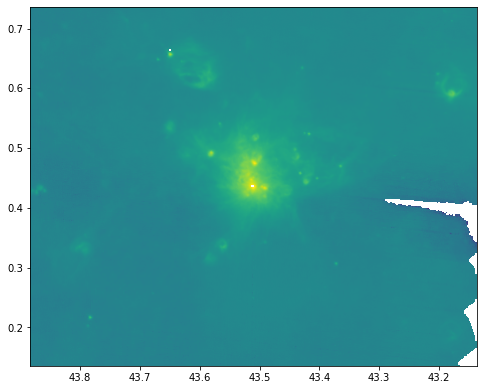

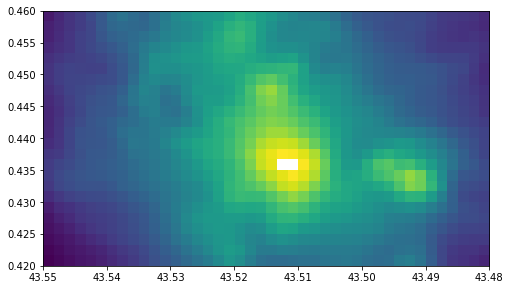

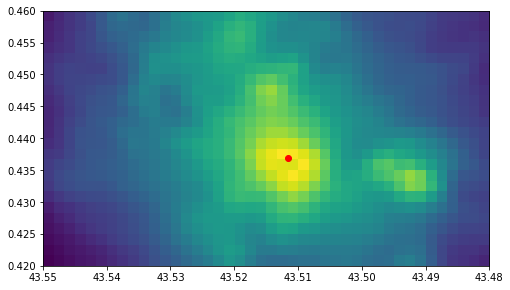

In [22]:
hdulist = fits.open('../selected/'+files[0])
hdu = hdulist[0]
header = hdu.header
data = hdu.data

x = header['crval1'] + header['cdelt1']*np.arange(0,header['naxis1'],1)
y = header['crval2'] + header['cdelt2']*np.arange(0,header['naxis2'],1)
y = y[::-1]

xl,xr = 43.55,43.48
yb,yt = 0.42,0.46

display_fits('../selected/'+files[0])

data_sub = display_fits('../selected/'+files[0],lims=[xl,xr,yb,yt],return_vals=True)

n = 1
grid = np.meshgrid(x[(x<=xl)&(x>=xr)],y[(y>=yb)&(y<=yt)])
#grid = np.meshgrid(x,y)
sat_area = np.isnan(data_sub)
params,corrected = fit(grid,data_sub,sat_area,FWHM=np.array(n*[[28.276492,28.276492]])/3600,peaks=n)
plt.figure(figsize=(8,8))
plt.imshow(np.log10(corrected),extent=(xl,xr,yb,yt))
for i in range(n):
    plt.plot(params[i*6],params[i*6+1],'ro')
plt.show()

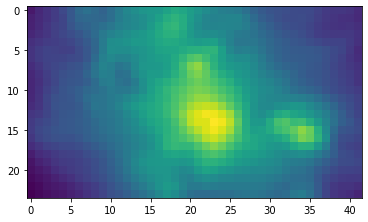

In [18]:
plt.imshow(np.log10(corrected))